In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

- Load the dataset(train & test)  
- combining dataset for future operation like modify or drop to that 2 data

In [3]:
# Acquire data

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df,test_df] 
# combining the data is for if
# we want to do some operation to data together

In [4]:
# Analyze by describing data

print(train_df.columns.values)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


There are different column in the dataset  
in test_df column Survived is not exist, my asumtion it is because test_df is use to **test the model of the machine learning** we build leter.

After get the column, we can categorize the type of dataset

Qualitattive:  
- Nominal : Name, Sex, ticket, Cabin, Embarked
- Ordinal : Pclass

Quantitatif :  
- Discrate : Survived, SibSp, Parch
- Continous : Age, Fare

In [5]:
# preview the data

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


After seeing the data we look at the Cabin and Ticket, they have mix data types alphabet and numeric.

that data is usefull for us to make learning

if we think about the largest data that include data like that it make our learning harder

In [6]:
len(train_df)

891

as we see the total train_df is 891 data

for see the struct of the column we use code below

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


seeing that info, we can assumption that all of the columns is not null, this mean there is no empty data.

but we see throught the tble there is NaN data, my assumption that NaN is the data mean unknown 

We do this info again to test_df

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


And same condition as train_df, just in the column Survived is not exist

With the information before we can decide which column we can analyst earlier without modify data such as Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

we will get more info with describe it

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


as we see, we get more info  
i see there is something can be considered:
- column Age, there is 714 count data
- column Cabin, there is just 204 data exist

In [12]:
train_df.Age.isna().sum()

177

OK then we get 177 data isnull in column Age

In [13]:
train_df.Cabin.isna().sum()

687

and 687 null data in column Cabin, and its a lot of data. and because of that we must deleted the column Cabin.

cause we dropping a column, i think i will drop column ticket to cause it's not related to possibility of survived  

In [14]:
train_df = train_df.drop(['Cabin','Ticket'],axis=1)
test_df = test_df.drop(['Cabin','Ticket'],axis=1)
combine = [train_df,test_df]

print("train :",train_df.columns.values)
print("test  :",test_df.columns.values)

train : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Fare' 'Embarked']
test  : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked']


We try to know which data is Null in column Age

In [15]:
age_null = [idx for idx, x in enumerate(train_df.Age.isnull()) if x==True]

age_null
train_df.loc[age_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,S


Then, we do some observation based on survived to Sex, Pclass, Parch, and SibSp

In [16]:
train_df["Survived"].value_counts().rename(index={0: "Dead", 1:"Survived"})


Dead        549
Survived    342
Name: Survived, dtype: int64

that is total dead or survived data from the train_df

In [17]:
train_df[["Sex",'Survived']]\
    .groupby(['Sex'], as_index=False)\
        .agg(['count','sum','mean'])\
            .sort_values(by=('Survived','mean'), ascending=False)

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

female is the highest priority to survived by mean 0.74, that mean most of female is survived

In [18]:
train_df[["Pclass",'Survived']]\
    .groupby(['Pclass'], as_index=False)\
        .agg(['count','sum','mean'])\
            .sort_values(by=('Survived','mean'), ascending=False)
        


Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

Passangger have Pclass 1, or first class is the most survived

In [19]:
train_df[["Parch",'Survived']]\
    .groupby(['Parch'], as_index=False)\
        .agg(['count','sum','mean'] )\
            .sort_values(by=('Survived','mean'), ascending=False)

Survived               
         count  sum      mean
Parch                        
3            5    3  0.600000
1          118   65  0.550847
2           80   40  0.500000
0          678  233  0.343658
5            5    1  0.200000
4            4    0  0.000000
6            1    0  0.000000

in this data passangger have 3 parent/childern on aboard the ship is survived, but is just 5 of all the passangger have 3 Parch, in second place is with 1 Parch

In [20]:
train_df[["SibSp",'Survived']]\
    .groupby(['SibSp'], as_index=False)\
        .agg(['count','sum','mean'] )\
            .sort_values(by=('Survived','mean'), ascending=False)

Survived               
         count  sum      mean
SibSp                        
1          209  112  0.535885
2           28   13  0.464286
0          608  210  0.345395
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000

as we see that passangger with 1 SibSp is top of mean Survived

Ok, with that information we just have all type of discrate data. now about the continous data  
continous data : Age and Fare

In [39]:
train_df[["Age",'Survived']]\
    .groupby(['Age'], as_index=False)\
        .agg(['count','sum','mean'] )\
            .sort_values(by=('Survived','mean'), ascending=False)

Survived         
         count sum mean
Age                    
0.42         1   1  1.0
5.00         4   4  1.0
63.00        2   2  1.0
53.00        1   1  1.0
0.67         1   1  1.0
...        ...  ..  ...
28.50        2   0  0.0
36.50        1   0  0.0
34.50        1   0  0.0
20.50        1   0  0.0
23.50        1   0  0.0

[88 rows x 3 columns]

In [40]:
train_df[["Fare",'Survived']]\
    .groupby(['Fare'], as_index=False)\
        .agg(['count','sum','mean'] )\
            .sort_values(by=('Survived','mean'), ascending=False)

Survived         
            count sum mean
Fare                      
512.3292        3   3  1.0
57.9792         2   2  1.0
13.8583         1   1  1.0
13.7917         1   1  1.0
13.4167         1   1  1.0
...           ...  ..  ...
15.5500         1   0  0.0
47.1000         1   0  0.0
46.9000         6   0  0.0
42.4000         1   0  0.0
21.0750         4   0  0.0

[248 rows x 3 columns]

As we see so hard to analyst cause column Age and Fare have a lot of unique data  
we use visualization to make easier to analyst 

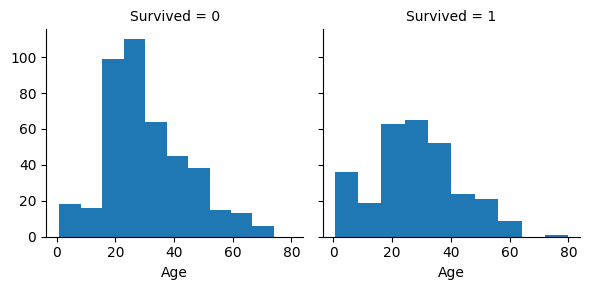

In [43]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age')

- there is age 0 years it is the null value, we can't modify that value, if we do that will impact the model in future
- between 20-50 is mostly not survived, while over than 50 and under 20 is mostly survived  


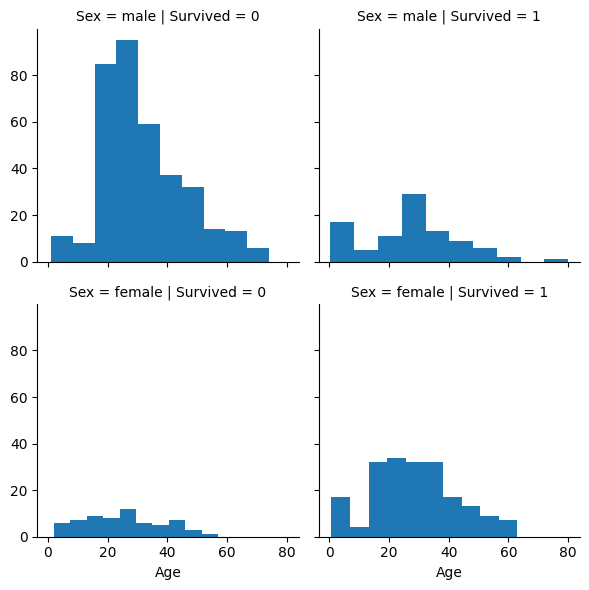

In [44]:
grid = sns.FacetGrid(train_df, col='Survived',row='Sex')
grid.map(plt.hist, 'Age')

- male is moslty not survived beside the female is mostly survived

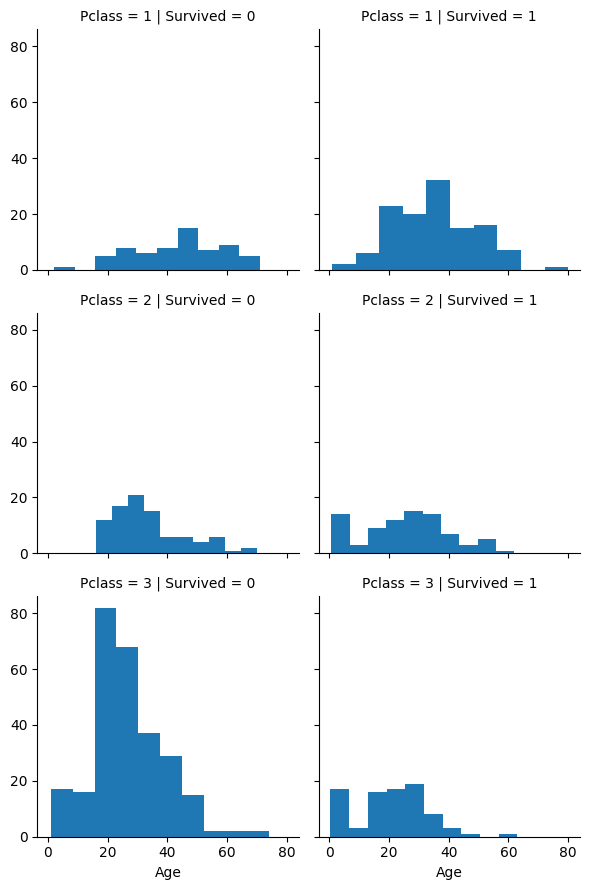

In [45]:
grid = sns.FacetGrid(train_df, col='Survived',row='Pclass')
grid.map(plt.hist, 'Age')

- first class is mostly survived, i think it is meybe there are important passangger or they have the riches to get first class, and be prioritized

C:\Users\firdauztri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\firdauztri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


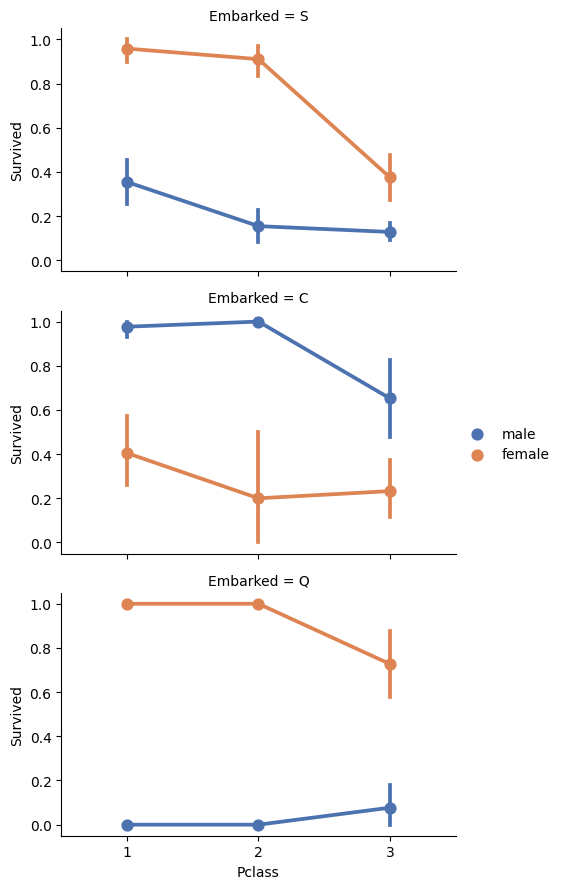

In [52]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C : Cherbourg, Q :Queenstown, S :Southampton